# CNN - Example 01

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Load Keras Dataset

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Visualize data

(60000, 28, 28)
(28, 28)


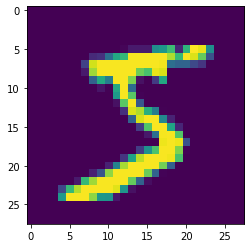

In [3]:
print(x_train.shape)
single_image = x_train[0]
print(single_image.shape)
plt.imshow(single_image)

### Pre-Process data

#### One Hot encode

In [4]:
# Make it one hot encoded otherwise it will think as a regression problem on a continuous axis
from tensorflow.keras.utils import to_categorical
print("Shape before one hot encoding" +str(y_train.shape))
y_example = to_categorical(y_train)
print(y_example)
print("Shape after one hot encoding" +str(y_train.shape))
y_example[0]

Shape before one hot encoding(60000,)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Shape after one hot encoding(60000,)


array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [5]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

#### Normalize the images

In [ ]:
x_train = x_train/255
x_test = x_test/255

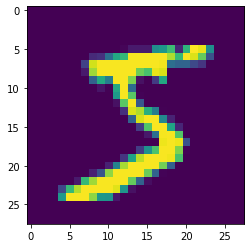

In [6]:
scaled_single = x_train[0]
plt.imshow(scaled_single)

#### Reshape the images

In [7]:
# Reshape to include channel dimension (in this case, 1 channel)
# x_train.shape
x_train = x_train.reshape(60000, 28, 28, 1)  
x_test = x_test.reshape(10000,28,28,1)

### Model # 1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
model = Sequential()

In [ ]:
# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))
# FLATTEN IMAGES FROM 28 by 28 to 764 BEFORE FINAL LAYER
model.add(Flatten())
# 128 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(128, activation='relu'))
# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))

Notes : If y is not one hot coded then loss= sparse_categorical_crossentropy

In [ ]:
model.compile(loss='categorical_crossentropy',  
              optimizer='adam',
              metrics=['accuracy', 'categorical_accuracy']) 
              # we can add in additional metrics https://keras.io/metrics/

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4608)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               589952    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Add Early Stopping

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

##### Training using one hot encoding

In [10]:
history = model.fit(x_train,y_cat_train,
                      epochs=10,
                      validation_data=(x_test,y_cat_test),
                      callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.1355 - accuracy: 0.9599 - categorical_accuracy: 0.9599 - val_loss: 0.0516 - val_accuracy: 0.9835 - val_categorical_accuracy: 0.9835
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0457 - accuracy: 0.9861 - categorical_accuracy: 0.9861 - val_loss: 0.0430 - val_accuracy: 0.9853 - val_categorical_accuracy: 0.9853
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0301 - accuracy: 0.9906 - categorical_accuracy: 0.9906 - val_loss: 0.0490 - val_accuracy: 0.9848 - val_categorical_accuracy: 0.9848
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0202 - accuracy: 0.9937 - categorical_accuracy: 0.9937 - val_loss: 0.0449 - val_accuracy: 0.9861 - val_categorical_accuracy: 0.9861


#### Save model

In [11]:
# Saving model
from tensorflow.keras.models import load_model
model_file = 'D:\\Sandbox\\Github\\MODELS\\' + '01_mnist.h5'
model.save(model_file)

#### Retreive model

Retrieve model
model = load_model(model_file)

#### Evaluate

Rule of thumb
1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

#### Eval - Train

In [14]:
model.metrics_names

['loss', 'accuracy', 'categorical_accuracy']

In [15]:
pd.DataFrame(history.history).head()
#pd.DataFrame(model.history.history).head()

,loss,accuracy,categorical_accuracy,val_loss,val_accuracy,val_categorical_accuracy
0,0.135456,0.959883,0.959883,0.051595,0.9835,0.9835
1,0.045711,0.986133,0.986133,0.043014,0.9853,0.9853
2,0.030148,0.990583,0.990583,0.048975,0.9848,0.9848
3,0.020199,0.993733,0.993733,0.044871,0.9861,0.9861


pd.DataFrame(history.history).plot()

In [17]:
losses = pd.DataFrame(history.history)

<AxesSubplot:>

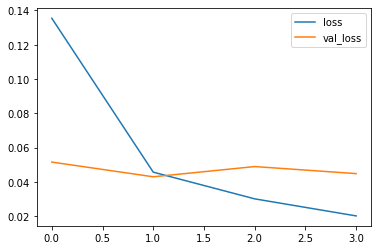

In [18]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

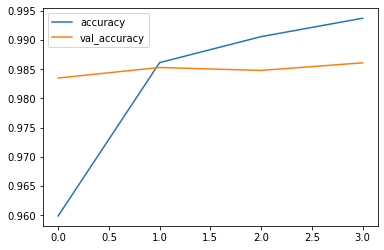

In [19]:
losses[['accuracy','val_accuracy']].plot()

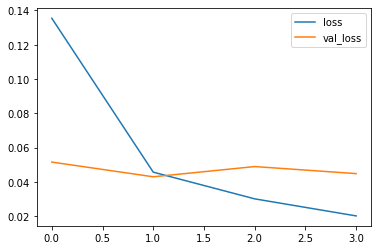

In [20]:
# Plot loss per iteration
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

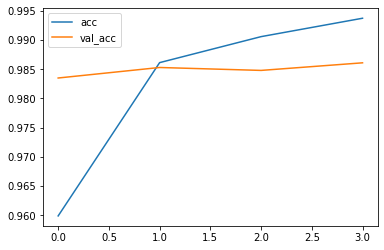

In [21]:
# Plot accuracy per iteration
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()

#### Eval - Test

In [22]:
test_metrics = model.evaluate(x_test,y_cat_test,verbose=1)

313/313 [==============================] - 1s 5ms/step - loss: 0.0449 - accuracy: 0.9861 - categorical_accuracy: 0.9861


In [23]:
print('Loss on test dataset:', test_metrics[0])
print('Accuracy on test dataset:', test_metrics[1])

Loss on test dataset: 0.044871386140584946
Accuracy on test dataset: 0.9861000180244446


In [24]:
print("Loss and Accuracy on Train dataset:")

Loss and Accuracy on Train dataset:


In [25]:
pd.DataFrame(history.history).tail(1)

,loss,accuracy,categorical_accuracy,val_loss,val_accuracy,val_categorical_accuracy
3,0.020199,0.993733,0.993733,0.044871,0.9861,0.9861


As it turns out, the accuracy on the test dataset is smaller than the accuracy on the training dataset. 
This is completely normal, since the model was trained on the `train_dataset`. 
When the model sees images it has never seen during training, (that is, from the `test_dataset`), 
we can expect performance to go down. 

#### Prediction

In [27]:
y_prediction = np.argmax(model.predict(x_test), axis=-1)

#### Reports

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       1.00      0.97      0.98       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 971    0    2    1    0    0    4    0    2    0]
 [   0 1124    1    4    0    1    2    1    2    0]
 [   1    1 1021    4    0    0    0    2    3    0]
 [   0    0    1 1003    0    2    0    0    3    1]
 [   0    0    2    0  949   

Recall (sensivity)   : Fraud detection recall because you want to catch FN (real fraud guys)
Precision (specificity): Sentiment analysis precision is important. You want to catch all feeling FP ()
F1 score  : Higher is better to compare two or more models
accuracy  : higher is better
error     : 1 - accuracy
Ideally, We want both Precision & Recall to be 1 but it is a zero-sum game. You can't have both 

<AxesSubplot:>

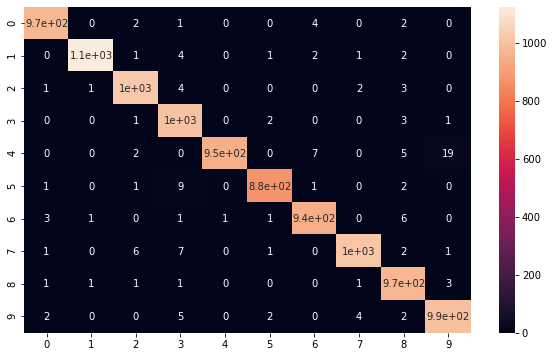

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Predictions go wrong!

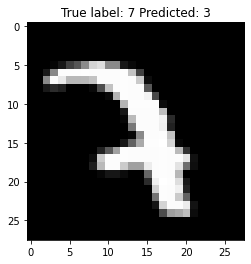

In [30]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_prediction[i]));

### Model # 2

In [51]:
model_2 = Sequential()

In [52]:
model_2.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu',))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Flatten())
model_2.add(Dense(128, activation='relu'))
model_2.add(Dense(10, activation='sigmoid'))
model_2.compile(loss='sparse_categorical_crossentropy',  +
              optimizer='adam',
              metrics=['accuracy']) 
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


#### Add Early Stopping

In [53]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [54]:
history_2 = model_2.fit(x_train,y_train,
                      epochs=10,
                      validation_data=(x_test,y_test),
                      callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 27s 15ms/step - loss: 0.1604 - accuracy: 0.9522 - val_loss: 0.0669 - val_accuracy: 0.9804
Epoch 2/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0525 - accuracy: 0.9839 - val_loss: 0.0455 - val_accuracy: 0.9855
Epoch 3/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0361 - accuracy: 0.9887 - val_loss: 0.0401 - val_accuracy: 0.9873
Epoch 4/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0246 - accuracy: 0.9917 - val_loss: 0.0390 - val_accuracy: 0.9879
Epoch 5/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0179 - accuracy: 0.9941 - val_loss: 0.0475 - val_accuracy: 0.9848
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0128 - accuracy: 0.9958 - val_loss: 0.0472 - val_accuracy: 0.9864


In [57]:
lossess = history_2.history
lossess.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [58]:
pd.DataFrame(lossess).head()

,loss,accuracy,val_loss,val_accuracy
0,0.160440,0.952217,0.066860,0.9804
1,0.052543,0.983933,0.045496,0.9855
2,0.036059,0.988683,0.040117,0.9873
3,0.024609,0.991733,0.039036,0.9879
4,0.017914,0.994150,0.047459,0.9848


In [59]:
pd.DataFrame(lossess).tail(1)

,loss,accuracy,val_loss,val_accuracy
5,0.012836,0.995817,0.04723,0.9864


<AxesSubplot:>

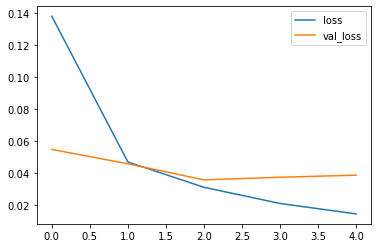

In [61]:
losses[['loss','val_loss']].plot()

<AxesSubplot:>

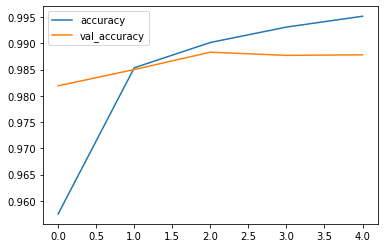

In [62]:
losses[['accuracy','val_accuracy']].plot()

#### Prediction

In [63]:
y_prediction = np.argmax(model_2.predict(x_test), axis=-1)

#### Reports

In [64]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_prediction))
print(confusion_matrix(y_test, y_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.97      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.99      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    1    0    0    0    0    0    2    1]
 [   1 1129    3    0    0    0    1    0    1    0]
 [   1    0 1021    0    2    0    0    3    5    0]
 [   0    0    4  991    0    4    0    2    9    0]
 [   0    0    0    0  978   

Recall (sensivity)   : Fraud detection recall because you want to catch FN (real fraud guys)
Precision (specificity): Sentiment analysis precision is important. You want to catch all feeling FP ()
F1 score  : Higher is better to compare two or more models
accuracy  : higher is better
error     : 1 - accuracy
Ideally, We want both Precision & Recall to be 1 but it is a zero-sum game. You can't have both 

<AxesSubplot:>

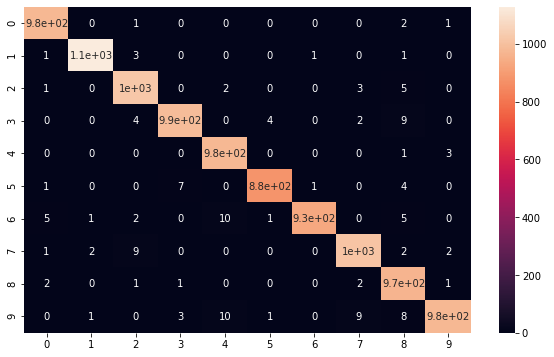

In [65]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,y_prediction),annot=True)

#### Predictions go wrong!

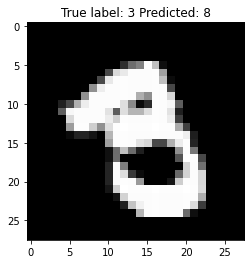

In [66]:
# Show some misclassified examples
misclassified_idx = np.where(y_prediction != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], y_prediction[i]));

#### Final thoughts

Rule of thumb
1. High Bias                        accuracy = 80% val-accuracy = 78%   (2%  gap)
2. High Variance                    accuracy = 98% val-accuracy = 80%   (18% gap)
3. High Bias and High Variance      accuracy = 80% val-accuracy = 60%   (20% gap)
4. Low Bias and Low Variance        accuracy = 98% val-accuracy = 96%   (2%  gap)

In [32]:
print("Percentage of wrong predcitions : " + str(len(misclassified_idx)/len(y_prediction)*100) + " %")
print("Models maximum accuracy            : " + str(np.max(history.history['accuracy'])*100) + " %")
print("Models maximum validation accuracy : " + str(np.max(history.history['val_accuracy'])*100) + " %")

Percentage of wrong predcitions : 1.39 %
Models maximum accuracy            : 99.37333464622498 %
Models maximum validation accuracy : 98.61000180244446 %


Model has Low Bias and Low Variance with less than 1% gap. It is already at 99% accuracy